In [12]:
using JLD2
using Printf
using CairoMakie
using FourierFlows
using Random
using LinearAlgebra: ldiv!, mul!
include("AnalysisUtils.jl")

compute_Ω (generic function with 1 method)

In [2]:
Random.seed!(123)
data_directory = "/scratch/nad9961/swqg/55612783/6"
#data_directory = "/scratch/nad9961/swqg/55672786/6"

"/scratch/nad9961/swqg/55612783/6"

In [30]:
Nqgsw_snapshots = count_qgsw_snapshots(data_directory)
idx = 100
grid = TwoDGrid(; nx=512, Lx=2π)
(t_snap, qh, ψh, uh, vh, Kd2) = load_qgswh_snapshot(data_directory, grid, idx)
(_, _, ψ, _, _, _) = load_qgsw_snapshot(data_directory, grid, idx)
σs, σn, σ, ζ = compute_strain_vorticity(ψh)
println(t_snap)

863.2088


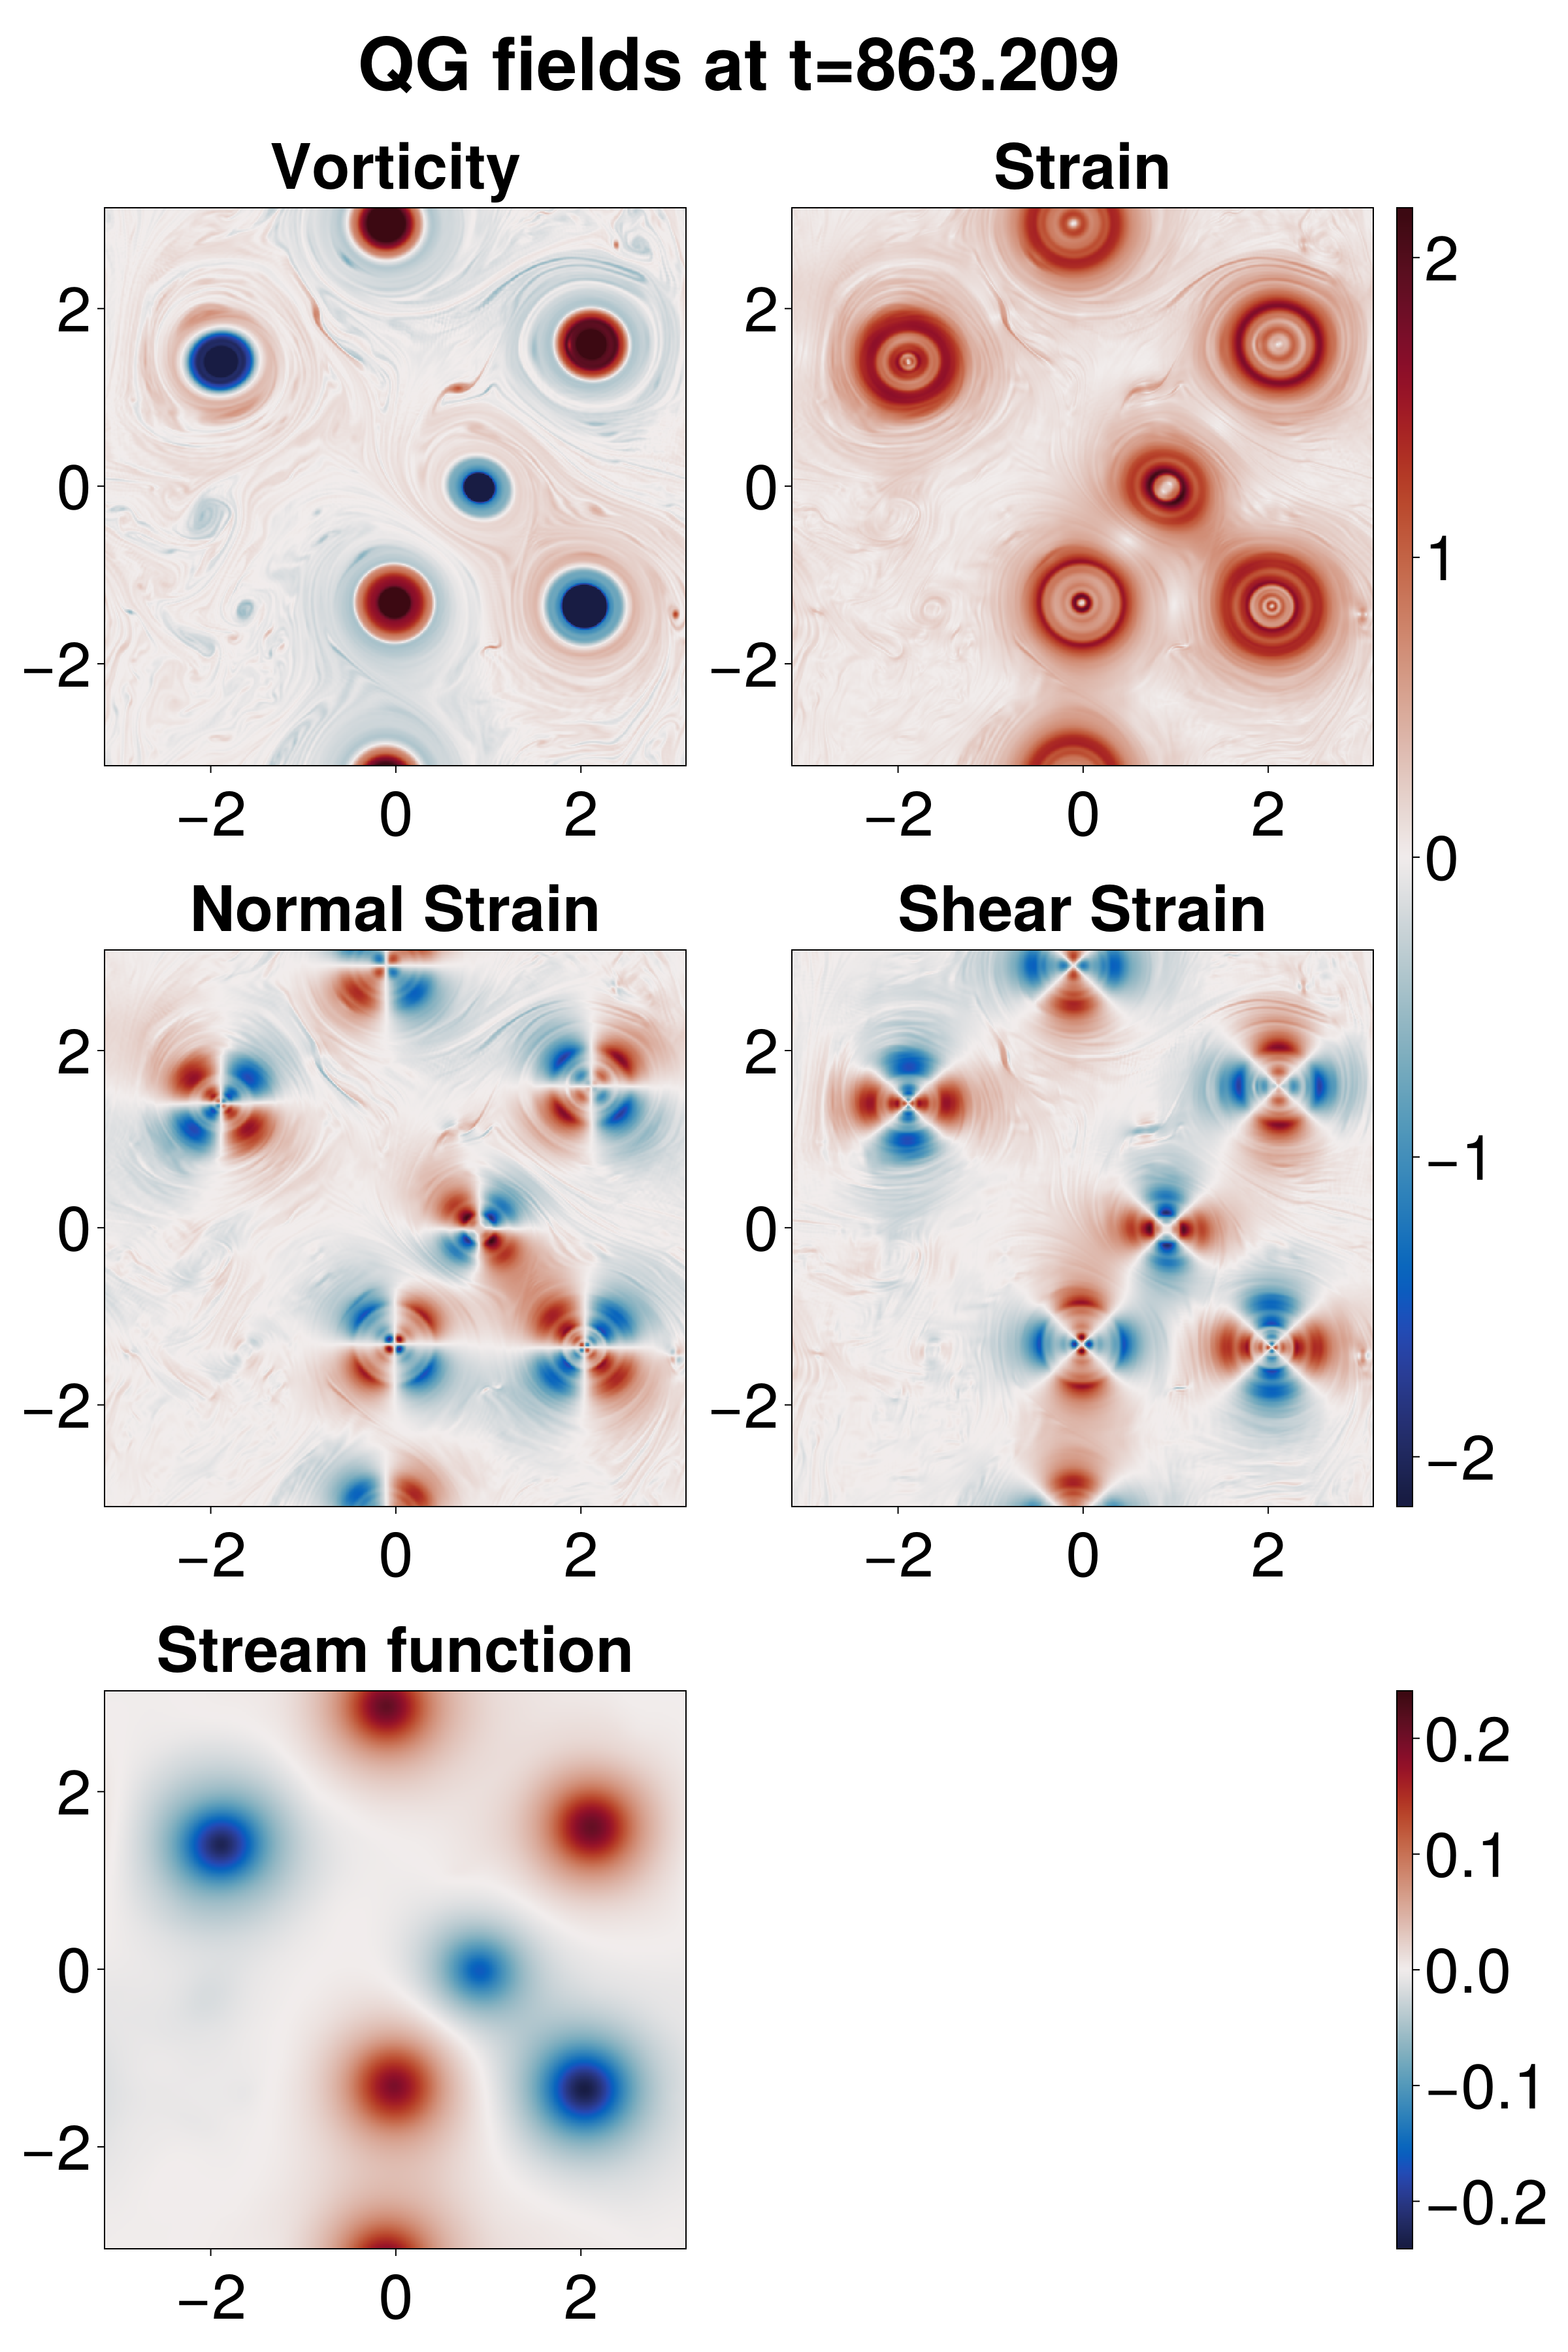

In [36]:
# Create plots of each field
field_fig = Figure(size=(1200, 1800), fontsize=48)
ζ_ax = Axis(field_fig[2,1], title="Vorticity")
σ_ax = Axis(field_fig[2,2], title="Strain")
σn_ax = Axis(field_fig[3,1], title="Normal Strain")
σs_ax = Axis(field_fig[3,2], title="Shear Strain")
ψ_ax = Axis(field_fig[4,1], title="Stream function")

σ = @. sqrt(σn^2 + σs^2)
cmax = max(maximum(abs.(σ)), maximum(abs.(σn)), maximum(abs.(σs)))
ψmax = maximum(abs.(ψ))
contour_opts = (colormap=:balance, colorrange=(-cmax, cmax))
contour_opts2 = (colormap=:balance, colorrange=(-ψmax, ψmax))

hm = heatmap!(ζ_ax,  grid.x, grid.y, ζ; contour_opts...)
heatmap!(σ_ax,  grid.x, grid.y, σ;  contour_opts...)
heatmap!(σn_ax, grid.x, grid.y, σn; contour_opts...)
heatmap!(σs_ax, grid.x, grid.y, σs; contour_opts...)
ψhm = heatmap!(ψ_ax, grid.x, grid.y, ψ; contour_opts2...)

cbar = Colorbar(field_fig[2:3,3], hm)
cbar = Colorbar(field_fig[4, 3], ψhm)
Label(field_fig[1,1:2], @sprintf("QG fields at t=%0.3f", t_snap); fontsize=56, font=:bold)

field_fig

Cross section at y = -1.9266798695843652


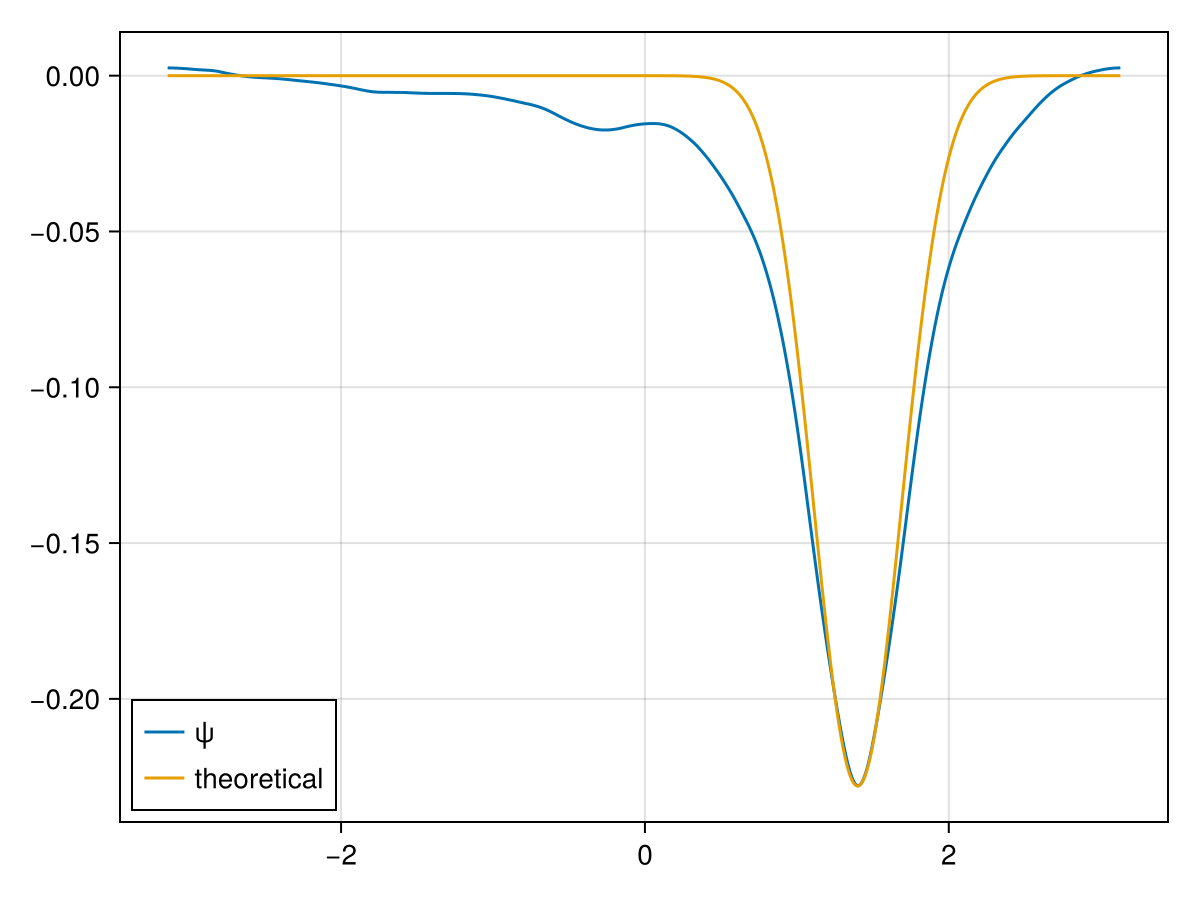

In [68]:
x_cross_idx = 100
println("Cross section at y = ",grid.x[x_cross_idx])
fig = Figure()
ax = Axis(fig[1,1])
#lines!(ax, grid.x, ζ[:, y_cross_idx], label="ζ")
#lines!(ax, grid.x, σs[:, y_cross_idx], label="σs")
#lines!(ax, grid.x, σn[:, y_cross_idx], label="σn")
#lines!(ax, grid.x, σ[:, y_cross_idx], label="σ")
lines!(ax, grid.x, ψ[x_cross_idx, :], label="ψ")
lines!(ax, grid.x, -0.228*exp.(-(grid.x.-1.4).^2*6), label="theoretical")

axislegend(ax, position=:lb)
fig